# Which Star Wars Movie is The Best?

An opinion poll team, [FiveThirtyEight](https://en.wikipedia.org/wiki/FiveThirtyEight), asked the question: **does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?** In order to answer this question the team created a survery from SurveyMonkey which recieved 835 respones total.

In the data we're analyzing there are several columns containing answers top questions about *Star Wars* movies. For some questions, the respondent had to check one or more boxes. Because of these the formatting of our data is a bit strange so there is going to be a lot of data restructuring in this project.

Data Dictionary:

 - `RespondentID` - An anonymized ID for the respondent (person taking the survey)
 - `Gender` - the respondent's gender
 - `Age` - the respondent's age
 - `Household Income` -  the respondent's income
 - `Education` - the respondent's education level
 - `Location (Census Region)` - the respondent's location
 - `Have you seen any of the 6 films in the Star Wars franchise?` - a Yes or No response
 - `Do you consider yourself to be a fan of the Star Wars film franchise?` - a Yes or No response


## Read in Data & Explore

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read in data
star_wars = pd.read_csv(r'C:\Users\david\Desktop\star_wars.csv', encoding='ISO-8859-1')
star_wars

# Pandas configuration
pd.set_option('display.max_columns', None)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [3]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [4]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning Data: Converting to Boolean l

Now we'll convert the strings "Yes" and "No" for the columns `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` into boolean values of `True` and `False`. Doing this will allow us to manipulate the data for analysis later.

In [5]:
# Change all specificed strings to specificed boolean value
yes_no = {'Yes':True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

# Check our work
star_wars[['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,True,True
1,False,NaN
2,True,False
3,True,True
4,True,True
...,...,...
1181,True,True
1182,True,True
1183,False,NaN
1184,True,True


## Cleaning Data:  Renaming Columns l

Furthermore we're going to rename the columns: `Which of the following Star Wars films have you seen? Please select all that apply.`, `Unnamed: 4`, `Unnamed: 5`, `Unnamed:6`, `Unnamed: 7`, and `Unnamed:8` to something more intuitive. These columns indiciate whether or not the respondent has seen the corresponding movie.

In [6]:
# Rename columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_ep_1',
    'Unnamed: 4':'seen_ep_2',
    'Unnamed: 5':'seen_ep_3',
    'Unnamed: 6':'seen_ep_4',
    'Unnamed: 7':'seen_ep_5',
    'Unnamed: 8':'seen_ep_6'})

# Check to see if it worked
print(star_wars.columns[3:9])
star_wars.head()

Index(['seen_ep_1', 'seen_ep_2', 'seen_ep_3', 'seen_ep_4', 'seen_ep_5',
       'seen_ep_6'],
      dtype='object')


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning Data: Converting to Boolean ll

For the columns we just renamed (`seen_ep_1,`, `seen_ep_2`, `seen_ep_3`, `seen_ep_4`, `seen_ep_5`, and `seen_ep_6`) if the respondent indicated that they have watched the movie then the movie name is entered as a string, if they respondent indicated that they have not seen the movie then then a `NaN` value will be present. 

Just like before we're going to convert the values of the renamed column to boolean values. `True` will indicate that the user has seen the movie and `False` indicates the user has not seen the movie.

In [7]:
star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'test'}, inplace=True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,test,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
# Some of the strings in our rows have double spaces, so we'll transform them to single spaces
star_wars = star_wars.replace(r'\s+', ' ', regex=True)

# Map string values to boolean values using for loop
movies_map = {
    'Star Wars: Episode I The Phantom Menace': True,
    np.nan:False,
    'Star Wars: Episode II Attack of the Clones':True,
    'Star Wars: Episode III Revenge of the Sith':True,
    'Star Wars: Episode IV A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True
    }
    
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies_map) 

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,test,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Unnamed: 13    2.513158
Unnamed: 14    3.047847
Unnamed: 12    3.272727
test           3.732934
Unnamed: 10    4.087321
Unnamed: 11    4.341317
dtype: float64

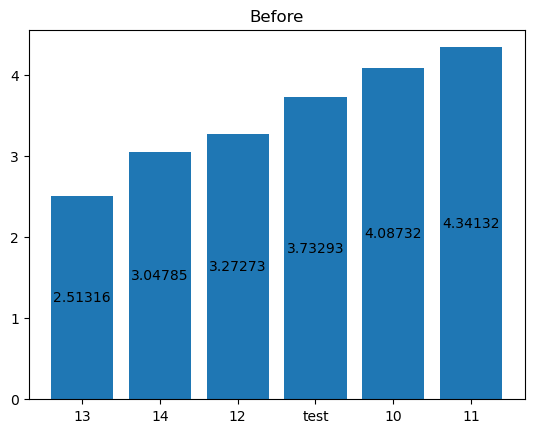

In [9]:
before = star_wars[star_wars.columns[9:15]].mean().sort_values()
before

p40 = plt.bar(range(6), before)
plt.bar_label(p40, label_type='center')
plt.xticks(range(6), labels=[13,14,12,'test',10,11])
plt.title('Before')
before

## Cleaning Data: Renaming Columns ll

For the columns `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`, `Unnamed: 10`, `Unnamed: 11`, `Unnamed:12`, `Unnamed: 13`, and `Unnamed: 14` we are going to rename these. The first column here indiciates how much a respondent enjoyed the movie, with 1 being the most liked movie and 6 being the least liked movie.

After that we're going to convert the values in these columns into floats instead of strings.

Lastly we're going to invert the values of the data, so that if a respondeent rated one of the movies as a 2 it will become a 5.0. Meaning that the higher the number the more the respondeent liked the movie. We are doing this because graphical representations of an individuals likeness of something usually follows the convention of a higher number for a greater likeness.

In [10]:
dvg = star_wars[star_wars.columns[9:15]].mean().sort_values(ascending=True)

In [11]:
# Rename Columns
star_wars = star_wars.rename(columns={
    'test':'episode_I_score',
    'Unnamed: 10':'episode_II_score',
    'Unnamed: 11':'episode_III_score',
    'Unnamed: 12':'episode_IV_score',
    'Unnamed: 13':'episode_V_score',
    'Unnamed: 14':'episode_VI_score'
    })

# Convert values to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Invert values
values_map = {
    1.0:6.0,
    2.0:5.0,
    3.0:4.0,
    4.0:3.0,
    5.0:2.0,
    6.0:1.0
}

for col in star_wars.columns[9:15]:
    star_wars[col] = star_wars[col].map(values_map)

# Check our work
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,episode_I_score,episode_II_score,episode_III_score,episode_IV_score,episode_V_score,episode_VI_score,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,6.0,5.0,4.0,3.0,2.0,1.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,2.0,1.0,6.0,5.0,3.0,4.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,2.0,3.0,1.0,5.0,6.0,4.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [12]:
# Find movie averages
avg = star_wars[star_wars.columns[9:15]].mean().sort_values(ascending=True)
avg


episode_III_score    2.658683
episode_II_score     2.912679
episode_I_score      3.267066
episode_IV_score     3.727273
episode_VI_score     3.952153
episode_V_score      4.486842
dtype: float64

In [13]:
dvg

Unnamed: 13    2.513158
Unnamed: 14    3.047847
Unnamed: 12    3.272727
test           3.732934
Unnamed: 10    4.087321
Unnamed: 11    4.341317
dtype: float64

Text(0.5, 1.0, 'After')

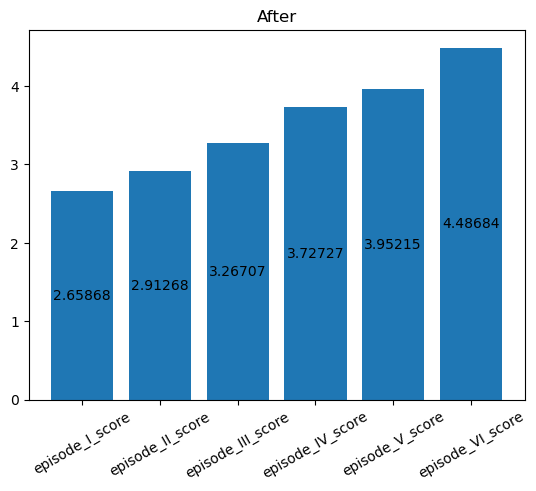

In [14]:
p50 = plt.bar(range(6), avg)
plt.xticks(range(6), labels=star_wars[star_wars.columns[9:15]],rotation=30)
plt.bar_label(p50, label_type='center')
plt.title('After')

## Analysis

Now that our data has been cleaned we can analyze and find connections. 

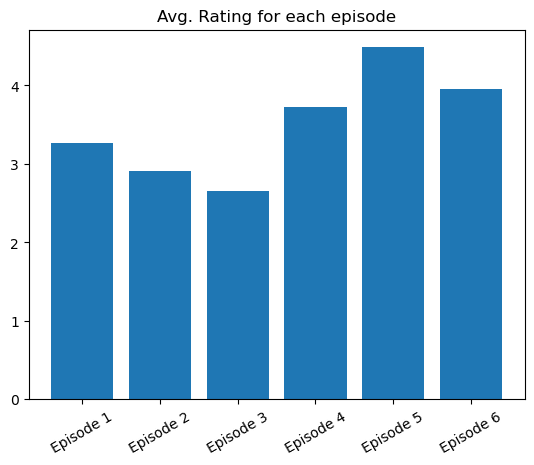

In [15]:
# Plot average score rating for each episode
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.xticks(ticks=range(6), labels=['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation=30)
plt.title('Avg. Rating for each episode')
plt.show()

We can see that episode 5, or The Empire Strikes Back, was the highest rated movie. This is most likely due to the nostalgia of it as it was [one of the first](https://www.disney.com.au/movies/a-star-wars-timeline-of-every-movie-in-order-of-release#:~:text=Star%20Wars%3A%20A%20New%20Hope,the%20desert%20planet%20of%20Tatooine.) Star Wars movies produced.

In [16]:
plt.bar(range(6), )

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
# Total number of times each movie was watched
star_wars[star_wars.columns[3:9]].sum()

In [ ]:
# Plot the total number of times each movie was watched
plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum())
plt.xticks(range(6), labels=['Episode I', 'Episode II ',
                            'Episode III ', 'Episode IV',
                            'Episode V ', 'Episode VI '
                            ], rotation=30)
plt.title('How Many Times Each Movie Was Watched')
plt.show()

### DESCRIPTION HERE!!!

In [ ]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [ ]:
avg = star_wars.iloc[:,9:15].mean().sort_values().reset_index()
avg.index += 1
avg

In [ ]:
plt.bar(data=avg, x='index', height=avg.index.to_list()[::-1])
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=30)

In [ ]:
avg.index.to_list()[::-2]

https://pandas.pydata.org/docs/reference/api/pandas.Series.to_list.html

In [ ]:
plt.figure(figsize=(16, 8))

a = np.arange(len(males.columns[9:15]))
y = 0.4

plt.subplot(1,2,1)
p1 = plt.bar(a, males[males.columns[9:15]].mean().round(2), label='Male', width=y)
p2 = plt.bar(a + y, females[females.columns[9:15]].mean().round(2), label='Female', width=y)
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Avg. Rating Per Movie')
plt.legend()

plt.bar_label(p1, label_type='center')
plt.bar_label(p2, label_type='center')

z = np.arange(len(females.columns[3:9]))

plt.subplot(1,2,2)
p3 = plt.bar(z, males[males.columns[3:9]].sum(), label='Male', width=y)
p4 = plt.bar(z + y, females[females.columns[3:9]].sum(), label='Female', width=y)
plt.legend(['Male','Female'])
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Views per Movie')

plt.bar_label(p3, label_type='center')
plt.bar_label(p4, label_type='center')

plt.show()

In [ ]:
 males[males.columns[9:15]].mean().round(2)